# Описание задачи

### Общие сведения

Подавляющее большинство звёзд может быть отнесено к одному из основных классов: O, B, A, F, G, K, M. В таком порядке эти классы образуют непрерывную последовательность по уменьшению эффективной температуры звезды и по цвету — от голубых к красным.Кроме основных спектральных классов существуют и другие для звёзд. Это, например, классы L, T, Y для коричневых карликов или C, S для углеродных звёзд и циркониевых звёзд. Для звёзд Вольфа — Райе используют класс W, для планетарных туманностей — P, для новых звёзд — Q. Каждый из этих классов, в свою очередь, делится на подклассы от 0 до 9 в порядке уменьшения температуры. Звёзды, относящиеся к одному спектральному классу, могут иметь сильно различающиеся светимости и абсолютные звёздные величины, поэтому для описания свойств звезды одного спектрального класса недостаточно. Классы светимости обозначаются римскими цифрами, которые ставятся после спектрального класса. 
Основные классы светимости в порядке уменьшения светимости:

    I — сверхгиганты
    II — яркие гиганты
    III — гиганты
    IV — субгиганты
    V — звёзды главной последовательности (карлики)
    VI — субкарлики
    VII — белые карлики

В редких случаях выделяют класс светимости VIII, к которому принадлежат ядра планетарных туманностей, превращающиеся в белые карлики

### Задача

Дана табилца, в которой указаны видимая звёздная величина (Visual Apparent Magnitude), дистанция (Distance), ошибка в измерении дистанции (Distance Error), показатель цвета B-V (BV), классификация звезды (Spectral Type). Необходимо по известным данным о звезде показать к какому классу светимости она относится.



In [69]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

# Читаем данные

In [70]:
url="https://raw.githubusercontent.com/BBzhenya/MachineLearning/main/StarClassification.csv"
data_raw=pd.read_csv(url)
data_raw

,Visual Apparent Magnitude,Distance,Distance Error,BV,Spectral Type
0,7.42,2.59,0.54,0.0,B6Vne
1,7.39,3.61,0.54,0.0,NaN
2,7.16,6.87,0.57,0.0,A0V
3,6.48,3.92,0.63,0.0,B7V
4,7.16,8.10,0.64,0.0,A0V
...,...,...,...,...,...
99991,9.84,NaN,NaN,NaN,NaN
99992,9.87,NaN,NaN,NaN,NaN
99993,9.90,NaN,NaN,NaN,NaN
99994,9.95,NaN,NaN,NaN,NaN


# Обработка данных

Последний столбец строится из трёх значений: спектральный класс, спектральный подкласс, класс светимости. Добавим в таблицу три новых столбца, каждый из которых соответсвует одному из этих значений, а этот удалим.

In [71]:
spectral_class=[]
spectral_subclass=[]
luminosity_class=[]

Во время разделения необходимо проверять является ли ячейка таблицы типом NaN. Если да, то ячейка заполняется пустой строкой.

In [72]:
import re

counter=0
while counter<data_raw.shape[0]:
    if pd.notna(data_raw.iat[counter,4]):
        temp1=re.findall(r'[A-Z]', str(data_raw.iat[counter,4]))
        temp2=re.findall(r'[0-9]+', str(data_raw.iat[counter,4]))
        temp3=re.findall(r'[A-Z]+', str(data_raw.iat[counter,4]))
        if len(temp1)!=0:
            spectral_class.append(temp1[0])
        else:
            spectral_class.append('')
        if len(temp2)!=0:
            spectral_subclass.append(temp2[0])
        else:
            spectral_subclass.append('')
        if len(temp3)>1:
            luminosity_class.append(temp3[1])
        else:
            luminosity_class.append('')           
    else:
        spectral_class.append('')
        spectral_subclass.append('')
        luminosity_class.append('')
    counter+=1

In [73]:
data_raw['Spectral Class']=spectral_class
data_raw['Spectral Subclass']=spectral_subclass
data_raw['Luminosity Class']=luminosity_class
del data_raw['Spectral Type']
data_raw

,Visual Apparent Magnitude,Distance,Distance Error,BV,Spectral Class,Spectral Subclass,Luminosity Class
0,7.42,2.59,0.54,0.0,B,6,V
1,7.39,3.61,0.54,0.0,,,
2,7.16,6.87,0.57,0.0,A,0,V
3,6.48,3.92,0.63,0.0,B,7,V
4,7.16,8.10,0.64,0.0,A,0,V
...,...,...,...,...,...,...,...
99991,9.84,NaN,NaN,NaN,,,
99992,9.87,NaN,NaN,NaN,,,
99993,9.90,NaN,NaN,NaN,,,
99994,9.95,NaN,NaN,NaN,,,


Столбцы Spectral Class, Spectral Subclass и Luminosity Class содержат категориальные значения. Они имеют тип 'Object'. Заменим на новый тип, который будет хранить категориальные значения. 

In [74]:
data_raw['Spectral Class']

0        B
1         
2        A
3        B
4        A
        ..
99991     
99992     
99993     
99994     
99995     
Name: Spectral Class, Length: 99996, dtype: object

In [75]:
data_raw['Spectral Subclass']

0        6
1         
2        0
3        7
4        0
        ..
99991     
99992     
99993     
99994     
99995     
Name: Spectral Subclass, Length: 99996, dtype: object

In [76]:
data_raw['Luminosity Class']

0        V
1         
2        V
3        V
4        V
        ..
99991     
99992     
99993     
99994     
99995     
Name: Luminosity Class, Length: 99996, dtype: object

In [77]:
data_raw['Spectral Class']=data_raw['Spectral Class'].astype('category')

In [78]:
data_raw['Spectral Class'].dtype

CategoricalDtype(categories=['', 'A', 'B', 'C', 'D', 'F', 'G', 'K', 'M', 'N', 'O', 'R',
                  'S', 'W'],
, ordered=False)

In [79]:
data_raw['Spectral Subclass']=data_raw['Spectral Subclass'].astype('category')

In [80]:
data_raw['Spectral Subclass'].dtype

CategoricalDtype(categories=['', '0', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9'], ordered=False)

Можем увидеть класс '10'. Это ошибка в данных, так как классы могут быть от '0' до '9'. Удалим это значение.

In [81]:
counter=0
while counter<data_raw.shape[0]:
    if data_raw.iat[counter,5]=='10':
        data_raw.iat[counter,5]=''
    counter+=1

In [82]:
data_raw['Luminosity Class']=data_raw['Luminosity Class'].astype('category')

In [84]:
data_raw['Luminosity Class'].dtype

CategoricalDtype(categories=['', 'I', 'II', 'III', 'IV', 'V', 'VII'], ordered=False)

Построим диаграммы рассеивания, чтобы посмотреть, как искомые классы зависят от расстояния.  

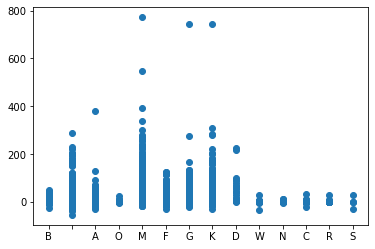

In [85]:
plt.scatter(data_raw['Spectral Class'], data_raw['Distance'])                         
pass

#безымянная отметка - строки в таблице, где отсутствуют данные

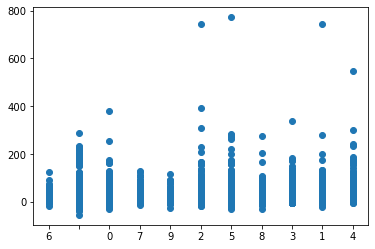

In [86]:
plt.scatter(data_raw['Spectral Subclass'], data_raw['Distance'])                         
pass

#безымянная отметка - строки в таблице, где отсутствуют данные

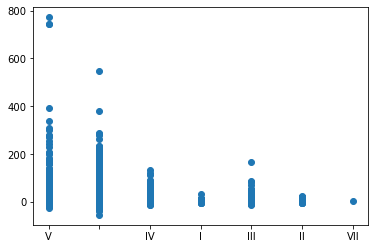

In [87]:
plt.scatter(data_raw['Luminosity Class'], data_raw['Distance'])                         
pass

#безымянная отметка - строки в таблице, где отсутствуют данные

Видно, что некоторые точки выделяются. Они указывают на очень большое расстояние. Найдём квантили для признака Distance.

In [88]:
data_raw['Distance'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    -2.66175
0.010    -1.54000
0.050     0.54000
0.100     1.20000
0.500     4.67000
0.900    15.15000
0.950    21.72750
0.990    45.36050
0.995    61.45875
Name: Distance, dtype: float64

Удалим все строки в таблице, в которых 'Distance' выходит за пределы кватилей 0.005 и 0.095

In [89]:
data = data_raw[
    (data_raw['Distance'] >= data_raw['Distance'].quantile(0.005)) &
    (data_raw['Distance'] <= data_raw['Distance'].quantile(0.995))]
data.shape

(98768, 7)

In [90]:
data

,Visual Apparent Magnitude,Distance,Distance Error,BV,Spectral Class,Spectral Subclass,Luminosity Class
0,7.42,2.59,0.54,0.0,B,6,V
1,7.39,3.61,0.54,0.0,,,
2,7.16,6.87,0.57,0.0,A,0,V
3,6.48,3.92,0.63,0.0,B,7,V
4,7.16,8.10,0.64,0.0,A,0,V
...,...,...,...,...,...,...,...
99867,12.86,11.28,9.63,NaN,,,
99868,10.93,23.66,9.70,NaN,,,
99869,9.27,0.61,9.73,NaN,,,
99870,10.40,15.12,9.78,NaN,,,


Проиллюстрируем обновлённые данные.

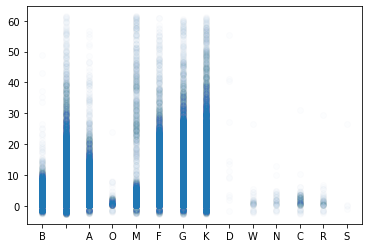

In [91]:
plt.scatter(data['Spectral Class'], data['Distance'], alpha=0.01)                         
pass

#безымянная отметка - строки в таблице, где отсутствуют данные

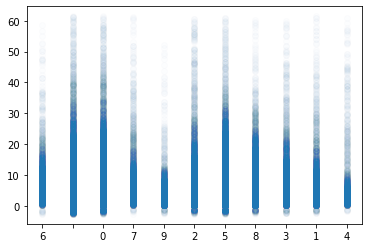

In [92]:
plt.scatter(data['Spectral Subclass'], data['Distance'],alpha=0.01)                         
pass

#безымянная отметка - строки в таблице, где отсутствуют данные

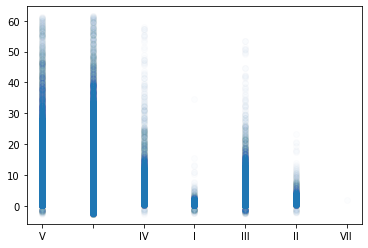

In [93]:
plt.scatter(data['Luminosity Class'], data['Distance'], alpha=0.01)                         
pass

#безымянная отметка - строки в таблице, где отсутствуют данные

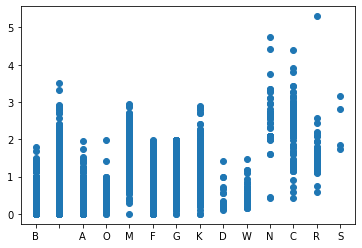

In [94]:
plt.scatter(data_raw['Spectral Class'], data_raw['BV'])                         
pass

#безымянная отметка - строки в таблице, где отсутствуют данные

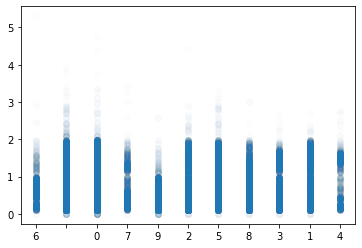

In [95]:
plt.scatter(data['Spectral Subclass'], data['BV'],alpha=0.01)                         
pass

#безымянная отметка - строки в таблице, где отсутствуют данные

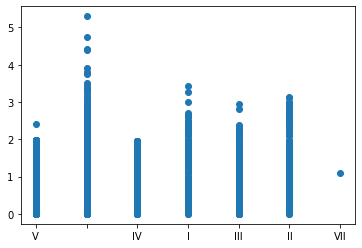

In [96]:
plt.scatter(data_raw['Luminosity Class'], data_raw['BV'])                         
pass

#безымянная отметка - строки в таблице, где отсутствуют данные

Во время разбиения столбца Spectral Type на Spectral Class, Spectral Subclass и Luminosity Class мы уже учитывали пропущенные значения и заменяли их пустой строкой. Присвоим им тип NaN.

In [97]:
counter=0
while counter<data.shape[0]:
    if data.iat[counter,4]=="":
        data.iat[counter,4]=np.NaN
    if data.iat[counter,5]=="":
        data.iat[counter,5]=np.NaN
    if data.iat[counter,6]=="":
        data.iat[counter,6]=np.NaN
    counter+=1

In [98]:
data

,Visual Apparent Magnitude,Distance,Distance Error,BV,Spectral Class,Spectral Subclass,Luminosity Class
0,7.42,2.59,0.54,0.0,B,6,V
1,7.39,3.61,0.54,0.0,NaN,NaN,NaN
2,7.16,6.87,0.57,0.0,A,0,V
3,6.48,3.92,0.63,0.0,B,7,V
4,7.16,8.10,0.64,0.0,A,0,V
...,...,...,...,...,...,...,...
99867,12.86,11.28,9.63,NaN,NaN,NaN,NaN
99868,10.93,23.66,9.70,NaN,NaN,NaN,NaN
99869,9.27,0.61,9.73,NaN,NaN,NaN,NaN
99870,10.40,15.12,9.78,NaN,NaN,NaN,NaN


Посмотрим, сколько пропущенных значений в каждом столбце матрицы

In [99]:
data.isna().sum()

Visual Apparent Magnitude        0
Distance                         0
Distance Error                   0
BV                           10025
Spectral Class               13976
Spectral Subclass            16177
Luminosity Class             62300
dtype: int64

Заполним медианами пропущенные значения столбце BV.

In [100]:
data.fillna(data.median(axis = 0), axis=0 , inplace=True)

C:\Users\Evgenia Pavlova\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Заполним модами пропущенные значения в столбцах Spectral Class, Spectral Subclass, Luminosity Class.

In [101]:
data['Spectral Class'].fillna(data['Spectral Class'].mode().iloc[0], inplace=True)
data['Spectral Subclass'].fillna(data['Spectral Subclass'].mode().iloc[0], inplace=True)
data['Luminosity Class'].fillna(data['Luminosity Class'].mode().iloc[0], inplace=True)

In [103]:
data.isna().sum()

Visual Apparent Magnitude    0
Distance                     0
Distance Error               0
BV                           0
Spectral Class               0
Spectral Subclass            0
Luminosity Class             0
dtype: int64

In [104]:
data

,Visual Apparent Magnitude,Distance,Distance Error,BV,Spectral Class,Spectral Subclass,Luminosity Class
0,7.42,2.59,0.54,0.00,B,6,V
1,7.39,3.61,0.54,0.00,K,0,V
2,7.16,6.87,0.57,0.00,A,0,V
3,6.48,3.92,0.63,0.00,B,7,V
4,7.16,8.10,0.64,0.00,A,0,V
...,...,...,...,...,...,...,...
99867,12.86,11.28,9.63,0.66,K,0,V
99868,10.93,23.66,9.70,0.66,K,0,V
99869,9.27,0.61,9.73,0.66,K,0,V
99870,10.40,15.12,9.78,0.66,K,0,V


In [105]:
data_old=data     #сохраним матрицу

Для начала обработаем категориальный признак 'Spectral Class'.

In [106]:
SpectralClass_dummies=pd.get_dummies(data['Spectral Class'])
SpectralClass_dummies.head()

,,A,B,C,D,F,G,K,M,N,O,R,S,W
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [107]:
data = pd.concat((data, SpectralClass_dummies), axis=1)     
data = data.drop(['Spectral Class'], axis=1)

Обработаем категориальный признак 'Spectral Subclass'.

In [108]:
SpectralSubclass_dummies=pd.get_dummies(data['Spectral Subclass'])
SpectralSubclass_dummies.head()

,,0,1,10,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0


In [109]:
data = pd.concat((data, SpectralSubclass_dummies), axis=1)     
data = data.drop(['Spectral Subclass'], axis=1)   

Обработаем категориальный признак 'Luminosity Class'

In [110]:
LuminosityClass_dummies=pd.get_dummies(data['Luminosity Class'])
LuminosityClass_dummies.head()

,,I,II,III,IV,V,VII
0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0


In [111]:
data = pd.concat((data, LuminosityClass_dummies), axis=1)     
data = data.drop(['Luminosity Class'], axis=1) 

In [112]:
data.head()

,Visual Apparent Magnitude,Distance,Distance Error,BV,,A,B,C,D,F,...,7,8,9,,I,II,III,IV,V,VII
0,7.42,2.59,0.54,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,7.39,3.61,0.54,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,7.16,6.87,0.57,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,6.48,3.92,0.63,0.0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,7.16,8.10,0.64,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Удалим безымянные столбцы (они остались поcле разделения Spectral Type на три новых класса) и столбец '10' (мы удаляли данные значения из таблицы, так как это ошибка).

In [113]:
del data['']
del data['10']

In [114]:
data.head()

,Visual Apparent Magnitude,Distance,Distance Error,BV,A,B,C,D,F,G,...,6,7,8,9,I,II,III,IV,V,VII
0,7.42,2.59,0.54,0.0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,7.39,3.61,0.54,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,7.16,6.87,0.57,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,6.48,3.92,0.63,0.0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,7.16,8.10,0.64,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Проведём нормализацию

In [115]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0) 

In [116]:
data_stand

,Visual Apparent Magnitude,Distance,Distance Error,BV,A,B,C,D,F,G,...,6,7,8,9,I,II,III,IV,V,VII
0,-0.751209,-0.585639,-0.581876,-1.714300,-0.403327,3.509972,-0.036163,-0.011473,-0.492859,-0.451974,...,6.653153,-0.145804,-0.316867,-0.199539,-0.081013,-0.090876,-0.405513,-0.182364,0.481371,-0.003182
1,-0.774338,-0.445269,-0.581876,-1.714300,-0.403327,-0.284900,-0.036163,-0.011473,-0.492859,-0.451974,...,-0.150303,-0.145804,-0.316867,-0.199539,-0.081013,-0.090876,-0.405513,-0.182364,0.481371,-0.003182
2,-0.951663,0.003364,-0.560849,-1.714300,2.479355,-0.284900,-0.036163,-0.011473,-0.492859,-0.451974,...,-0.150303,-0.145804,-0.316867,-0.199539,-0.081013,-0.090876,-0.405513,-0.182364,0.481371,-0.003182
3,-1.475928,-0.402608,-0.518794,-1.714300,-0.403327,3.509972,-0.036163,-0.011473,-0.492859,-0.451974,...,-0.150303,6.858457,-0.316867,-0.199539,-0.081013,-0.090876,-0.405513,-0.182364,0.481371,-0.003182
4,-0.951663,0.172633,-0.511785,-1.714300,2.479355,-0.284900,-0.036163,-0.011473,-0.492859,-0.451974,...,-0.150303,-0.145804,-0.316867,-0.199539,-0.081013,-0.090876,-0.405513,-0.182364,0.481371,-0.003182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99867,3.442908,0.610257,5.789366,-0.270561,-0.403327,-0.284900,-0.036163,-0.011473,-0.492859,-0.451974,...,-0.150303,-0.145804,-0.316867,-0.199539,-0.081013,-0.090876,-0.405513,-0.182364,0.481371,-0.003182
99868,1.954922,2.313962,5.838429,-0.270561,-0.403327,-0.284900,-0.036163,-0.011473,-0.492859,-0.451974,...,-0.150303,-0.145804,-0.316867,-0.199539,-0.081013,-0.090876,-0.405513,-0.182364,0.481371,-0.003182
99869,0.675099,-0.858122,5.859456,-0.270561,-0.403327,-0.284900,-0.036163,-0.011473,-0.492859,-0.451974,...,-0.150303,-0.145804,-0.316867,-0.199539,-0.081013,-0.090876,-0.405513,-0.182364,0.481371,-0.003182
99870,1.546304,1.138709,5.894502,-0.270561,-0.403327,-0.284900,-0.036163,-0.011473,-0.492859,-0.451974,...,-0.150303,-0.145804,-0.316867,-0.199539,-0.081013,-0.090876,-0.405513,-0.182364,0.481371,-0.003182


# Разбиение данных на обучающую и тестовую выборки

Для предсказания класса светимости будем использовать все признаки кроме 'Distance Error'.

In [117]:
X = data_stand.drop(['I','II','III','IV','V','VII','Distance Error'], axis=1)
y = data_old['Luminosity Class']

In [118]:
X

,Visual Apparent Magnitude,Distance,BV,A,B,C,D,F,G,K,...,0,1,2,3,4,5,6,7,8,9
0,-0.751209,-0.585639,-1.714300,-0.403327,3.509972,-0.036163,-0.011473,-0.492859,-0.451974,-0.787361,...,-0.849217,-0.211709,-0.372396,-0.25055,-0.128687,-0.450169,6.653153,-0.145804,-0.316867,-0.199539
1,-0.774338,-0.445269,-1.714300,-0.403327,-0.284900,-0.036163,-0.011473,-0.492859,-0.451974,1.270052,...,1.177544,-0.211709,-0.372396,-0.25055,-0.128687,-0.450169,-0.150303,-0.145804,-0.316867,-0.199539
2,-0.951663,0.003364,-1.714300,2.479355,-0.284900,-0.036163,-0.011473,-0.492859,-0.451974,-0.787361,...,1.177544,-0.211709,-0.372396,-0.25055,-0.128687,-0.450169,-0.150303,-0.145804,-0.316867,-0.199539
3,-1.475928,-0.402608,-1.714300,-0.403327,3.509972,-0.036163,-0.011473,-0.492859,-0.451974,-0.787361,...,-0.849217,-0.211709,-0.372396,-0.25055,-0.128687,-0.450169,-0.150303,6.858457,-0.316867,-0.199539
4,-0.951663,0.172633,-1.714300,2.479355,-0.284900,-0.036163,-0.011473,-0.492859,-0.451974,-0.787361,...,1.177544,-0.211709,-0.372396,-0.25055,-0.128687,-0.450169,-0.150303,-0.145804,-0.316867,-0.199539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99867,3.442908,0.610257,-0.270561,-0.403327,-0.284900,-0.036163,-0.011473,-0.492859,-0.451974,1.270052,...,1.177544,-0.211709,-0.372396,-0.25055,-0.128687,-0.450169,-0.150303,-0.145804,-0.316867,-0.199539
99868,1.954922,2.313962,-0.270561,-0.403327,-0.284900,-0.036163,-0.011473,-0.492859,-0.451974,1.270052,...,1.177544,-0.211709,-0.372396,-0.25055,-0.128687,-0.450169,-0.150303,-0.145804,-0.316867,-0.199539
99869,0.675099,-0.858122,-0.270561,-0.403327,-0.284900,-0.036163,-0.011473,-0.492859,-0.451974,1.270052,...,1.177544,-0.211709,-0.372396,-0.25055,-0.128687,-0.450169,-0.150303,-0.145804,-0.316867,-0.199539
99870,1.546304,1.138709,-0.270561,-0.403327,-0.284900,-0.036163,-0.011473,-0.492859,-0.451974,1.270052,...,1.177544,-0.211709,-0.372396,-0.25055,-0.128687,-0.450169,-0.150303,-0.145804,-0.316867,-0.199539


In [119]:
y

0        V
1        V
2        V
3        V
4        V
        ..
99867    V
99868    V
99869    V
99870    V
99873    V
Name: Luminosity Class, Length: 98768, dtype: category
Categories (7, object): ['', 'I', 'II', 'III', 'IV', 'V', 'VII']

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(66174, 32594)

# Обучение классификатора

In [121]:
from sklearn.neural_network import MLPClassifier

Подбор гиперпараметра регуляризации alpha

In [187]:
# 1 скрытый слой, 100 нейронов

mlp_model_1_100 = MLPClassifier(hidden_layer_sizes = (100,),
                          solver = 'lbfgs', max_iter=1000,
                          activation = 'logistic',
                          random_state = 42)

In [188]:
%%time
mlp_model_1_100.fit(X_train, y_train)

Wall time: 14min 57s


C:\Users\Evgenia Pavlova\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='logistic', max_iter=1000, random_state=42,
              solver='lbfgs')

In [189]:
# 1 скрытый слой, 50 нейронов

mlp_model_1_50 = MLPClassifier(hidden_layer_sizes = (50,),
                          solver = 'lbfgs', max_iter=1000,
                          activation = 'logistic',
                          random_state = 42)

In [190]:
%%time
mlp_model_1_50.fit(X_train, y_train)

Wall time: 9min 25s


C:\Users\Evgenia Pavlova\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='logistic', hidden_layer_sizes=(50,), max_iter=1000,
              random_state=42, solver='lbfgs')

In [191]:
# 1 скрытый слой, 25 нейронов

mlp_model_1_25 = MLPClassifier(hidden_layer_sizes = (25,),
                          solver = 'lbfgs', max_iter=1000,
                          activation = 'logistic',
                          random_state = 42)

In [195]:
%%time
mlp_model_1_25.fit(X_train, y_train)

Wall time: 4min 15s


MLPClassifier(activation='logistic', hidden_layer_sizes=(25,), max_iter=1000,
              random_state=42, solver='lbfgs')

In [196]:
# 2 скрытых слоя, 100 нейронов

mlp_model_2_100 = MLPClassifier(hidden_layer_sizes = (100,100),
                          solver = 'lbfgs', max_iter=1000,
                          activation = 'logistic',
                          random_state = 42)

In [197]:
%%time
mlp_model_2_100.fit(X_train, y_train)

C:\Users\Evgenia Pavlova\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Wall time: 31min 36s


MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100),
              max_iter=1000, random_state=42, solver='lbfgs')

In [198]:
# 2 скрытых слоя, 50 нейронов

mlp_model_2_50 = MLPClassifier(hidden_layer_sizes = (50,50),
                          solver = 'lbfgs', max_iter=1000,
                          activation = 'logistic',
                          random_state = 42)

In [199]:
%%time
mlp_model_2_50.fit(X_train, y_train)

Wall time: 18min 56s


C:\Users\Evgenia Pavlova\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='logistic', hidden_layer_sizes=(50, 50), max_iter=1000,
              random_state=42, solver='lbfgs')

In [200]:
# 2 скрытых слоя, 25 нейронов

mlp_model_2_25 = MLPClassifier(hidden_layer_sizes = (25,25),
                          solver = 'lbfgs', max_iter=1000,
                          activation = 'logistic',
                          random_state = 42)

In [201]:
%%time
mlp_model_2_25.fit(X_train, y_train)

Wall time: 10min 9s


MLPClassifier(activation='logistic', hidden_layer_sizes=(25, 25), max_iter=1000,
              random_state=42, solver='lbfgs')

## Проверяем качество классификатора

In [202]:
y_train_pred_1_100 = mlp_model_1_100.predict(X_train)
y_test_pred_1_100 = mlp_model_1_100.predict(X_test)

print(np.mean(y_train != y_train_pred_1_100), np.mean(y_test != y_test_pred_1_100))

0.11487895548100463 0.12266061238264711


In [203]:
y_train_pred_1_50 = mlp_model_1_50.predict(X_train)
y_test_pred_1_50 = mlp_model_1_50.predict(X_test)

print(np.mean(y_train != y_train_pred_1_50), np.mean(y_test != y_test_pred_1_50))

0.11672257986520386 0.12183223906240412


In [204]:
y_train_pred_1_25 = mlp_model_1_25.predict(X_train)
y_test_pred_1_25 = mlp_model_1_25.predict(X_test)

print(np.mean(y_train != y_train_pred_1_25), np.mean(y_test != y_test_pred_1_25))

0.11918578293589627 0.12109590722218813


In [205]:
y_train_pred_2_100 = mlp_model_2_100.predict(X_train)
y_test_pred_2_100 = mlp_model_2_100.predict(X_test)

print(np.mean(y_train != y_train_pred_2_100), np.mean(y_test != y_test_pred_2_100))

0.11270287424063832 0.12499232987666442


In [206]:
y_train_pred_2_50 = mlp_model_2_50.predict(X_train)
y_test_pred_2_50 = mlp_model_2_50.predict(X_test)

print(np.mean(y_train != y_train_pred_2_50), np.mean(y_test != y_test_pred_2_50))

0.11323178287544958 0.12493096888997975


In [207]:
y_train_pred_2_25 = mlp_model_2_25.predict(X_train)
y_test_pred_2_25 = mlp_model_2_25.predict(X_test)

print(np.mean(y_train != y_train_pred_2_25), np.mean(y_test != y_test_pred_2_25))

0.11663190981352192 0.12161747560900779


## Подбор гиперпараметров

Подберем оптимальное значение параметра регуляризации alpha.
Рассмотрим модель с одним скрытым слоем и 100 нейтронами

In [209]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []


for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

C:\Users\Evgenia Pavlova\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Evgenia Pavlova\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Evgenia Pavlova\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (sta

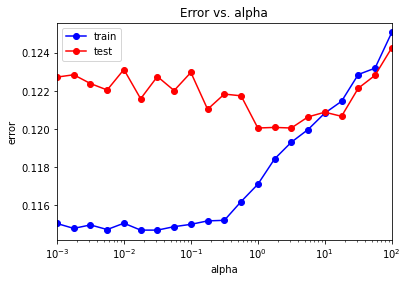

In [215]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

Минимальное значение ошибки:

In [217]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.11469761537764077 0.12005277044854881


Оптимальное значение alpha:

In [218]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[1.         3.16227766]


In [221]:
test_err==min_test_err

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False])

In [224]:
alpha_arr

array([1.00000000e-03, 1.77827941e-03, 3.16227766e-03, 5.62341325e-03,
       1.00000000e-02, 1.77827941e-02, 3.16227766e-02, 5.62341325e-02,
       1.00000000e-01, 1.77827941e-01, 3.16227766e-01, 5.62341325e-01,
       1.00000000e+00, 1.77827941e+00, 3.16227766e+00, 5.62341325e+00,
       1.00000000e+01, 1.77827941e+01, 3.16227766e+01, 5.62341325e+01,
       1.00000000e+02])

In [229]:
alpha_opt=alpha_arr[12]
alpha_opt

1.0

Классификатор при найденном оптимальном значении alpha

In [232]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100,),
                          solver = 'lbfgs', max_iter=1000, activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

C:\Users\Evgenia Pavlova\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.1171003717472119
0.12005277044854881


Подберём оптимальное число нейтронов

In [214]:
number_arr = []
test_err_2 = []
train_err_2 = []

for number in range(25,235,10):
    number_arr.append(number)

for number in number_arr:
    mlp_model = MLPClassifier(hidden_layer_sizes = (number,), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err_2.append(np.mean(y_train != y_train_pred))
    test_err_2.append(np.mean(y_test != y_test_pred))

C:\Users\Evgenia Pavlova\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Evgenia Pavlova\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Evgenia Pavlova\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (sta

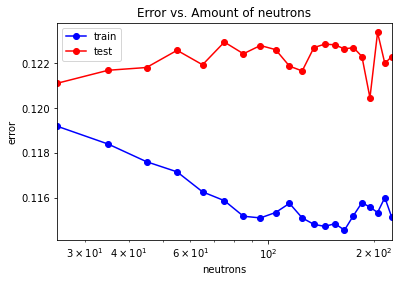

In [216]:
plt.semilogx(number_arr, train_err_2, 'b-o', label = 'train')
plt.semilogx(number_arr, test_err_2, 'r-o', label = 'test')
plt.xlim([np.min(number_arr), np.max(number_arr)])
plt.title('Error vs. Amount of neutrons')
plt.xlabel('neutrons')
plt.ylabel('error')
plt.legend()

Минимальное значение ошибки:

In [231]:
min_train_err_2 = np.min(train_err_2)
min_test_err_2 = np.min(test_err_2)
print(min_train_err_2, min_test_err_2)

0.11454649862483755 0.12045161686199914


Оптимальное количество нейтронов

In [234]:
test_err_2 == min_test_err_2

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False])

In [235]:
number_arr

[25,
 35,
 45,
 55,
 65,
 75,
 85,
 95,
 105,
 115,
 125,
 135,
 145,
 155,
 165,
 175,
 185,
 195,
 205,
 215,
 225]

In [236]:
number_opt=number_arr[17]
number_opt

195

Классификатор при найденном оптимальном числе нейтронов

In [237]:
mlp_model = MLPClassifier(hidden_layer_sizes = (number_opt,),
                          solver = 'lbfgs', max_iter=1000, activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

C:\Users\Evgenia Pavlova\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.11557409254389941
0.12045161686199914


## Выводы

Наблюдается недообучение - ошибка на тестовой выборке довольно-таки велика. 
Можно заметить, что алгоритм "lbfgs" не сходится при данном максимальном числе итераций. Большее число итераций приведёт к большим временным затратам.
Если говорить про зависимость ошибки от параметра регуляции, то можно увидеть, что на обучающей выборке, чем меньше параметр alpha, тем точнее результат. К сожалению, на тестовой выборке зависимость не просматривается. 
Так же можно заметить, что чем больше число нейронов, тем точнее работает алгоритм. На тестовой же выборке снова явная зависимость не просматривается.